<a href="https://colab.research.google.com/github/koalalovepabro/Stock-Portfolio-Optimization/blob/main/Test/Stock_Portfolio(%EA%B8%89%EB%93%B1%EC%A3%BC)_ver2.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **üìà Ï¢ÖÎ™©ÏÑ†ÌÉù Î∞©Î≤ï**
- Í∏âÎì±Ï£º Ìè¨Ï∞©: ÌäπÏ†ï Í±∞ÎûòÏùºÏùò Í±∞ÎûòÎüâÏù¥ Ïù¥Ï†Ñ ÏãúÏ†êÏùò ÌèâÍ∑† Í±∞ÎûòÎüâÎ≥¥Îã§ 1,000% Ïù¥ÏÉÅ Í∏âÏ¶ùÌïòÎäî Ï¢ÖÎ™©ÏùÑ ÏÑ†ÌÉù  
- ‚ÄòÏù¥Ï†Ñ ÏãúÏ†êÏùò ÌèâÍ∑† Í±∞ÎûòÎüâ‚ÄôÏùÑ ÌäπÏ†ï Í±∞ÎûòÏùº Ïù¥Ï†ÑÏùò 20Ïùº(Í±∞ÎûòÏùº Í∏∞Ï§Ä) ÎèôÏïàÏùò ÌèâÍ∑† Í±∞ÎûòÎüâÏúºÎ°ú Ï†ïÏùò



# **üìä Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî Î∞©Î≤ï**  
1. **Max Sharpe Ratio** : ÏÉ§ÌîÑÎπÑÏú®Ïù¥ ÏµúÎåÄÍ∞Ä ÎêòÎèÑÎ°ù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî  
    => ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±ÏùÑ Î™®Îëê Í≥†Î†§
2. **‚úî Efficient Risk**   : Ï£ºÏñ¥ÏßÑ Î≥ÄÎèôÏÑ± ( target_volatility ) Î≥¥Îã§ ÎÇÆÏùÄ Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ÏàòÏùµÎ•† (Return)Ïù¥ ÏµúÎåÄÍ∞Ä ÎêòÎèÑÎ°ù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî  
    => ÎÜíÏùÄ Ïù¥ÏùµÏùÑ Ï∂îÍµ¨ÌïòÍ∏∞ Î≥¥Îã§Îäî, ÎπÑÍµêÏ†Å ÏúÑÌóòÏù¥ ÎÇÆÏùÄ Ìà¨ÏûêÎ•º ÏõêÌïòÎäî Ìà¨ÏûêÏûêÏóêÍ≤å Ï∂îÏ≤ú
3. **Efficient Return** : Ï£ºÏñ¥ÏßÑ Î¶¨Ïä§ÌÅ¨ ( target_return )ÏùÑ ÎßåÏ°±ÏãúÌÇ§Îäî ÏÑ†ÏóêÏÑú Î≥ÄÎèôÏÑ±(volatility)Î•º ÏµúÏÜåÍ∞Ä ÎêòÎèÑÎ°ù Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî  
    => ÎÜíÏùÄ ÏúÑÌóòÏùÑ Í∞êÏàòÌïòÎçîÎùºÎèÑ, ÎÜíÏùÄ Ïù¥ÏùµÏùÑ Ï∂îÍµ¨ÌïòÎäî Ìà¨Ïûê ÏÑ±Ìñ•ÏùÑ Í∞ÄÏßÑ Ìà¨ÏûêÏûêÏóêÍ≤å Ï∂îÏ≤ú

In [1]:
!pip install -q install finance-datareader

In [2]:
!pip install pykrx

In [3]:
!pip install matplotlib

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
from pykrx import stock
import datetime

In [5]:
def check_speedy_rising_volume_yesterday(code): # Ïñ¥Ï†úÎ•º Í∏∞Ï§ÄÏúºÎ°ú 
    today = datetime.datetime.today().strftime("%Y%m%d")
    df = fdr.DataReader(code, '2020-01-01')
    volumes = df['Volume'].iloc[::-1]

    if len(volumes) < 22: # Ï¥ù 22Ïùº ÏπòÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ Ï†úÏô∏(ÏµúÍ∑º ÏÉÅÏû• Ï¢ÖÎ™©)
        return False

    sum_vol20 = 0
    today_vol = 0

    for i, vol in enumerate(volumes):
        if i == 0: # Ïò§Îäò ÎÇ†Ïßú
            continue
        elif i == 1: # Ïñ¥Ï†ú ÎÇ†Ïßú
            today_vol = vol
        elif 2 <= i <= 21: 
            sum_vol20 += vol
        else:
            break

    avg_vol20 = sum_vol20 / 20 # ÏµúÍ∑º 20ÏùºÍ∞Ñ ÌèâÍ∑† Í±∞ÎûòÎüâ Íµ¨ÌïòÍ∏∞
    if today_vol > avg_vol20 * 10: # Ï°∞Ìöå ÏãúÏûëÏùºÏùò Í±∞ÎûòÎüâÏù¥ ÌèâÍ∑† Í±∞ÎûòÎüâÏùÑ 1000% Ï¥àÍ≥ºÌïúÎã§Î©¥ True
        return True

# Ï†ÑÏ≤¥ Ï¢ÖÎ™© Í∞ÄÏ†∏Ïò§Í∏∞

In [ ]:
# Ïò§Îäò KOSPI&KOSDAQ Ï¢ÖÎ™© Ï†ÑÏ≤¥ Î∂àÎü¨Ïò§Í∏∞
today = datetime.datetime.today().strftime("%Y%m%d")
kospi = stock.get_market_fundamental_by_ticker(today, market='KOSPI').index
kosdaq = stock.get_market_fundamental_by_ticker(today, market='KOSDAQ').index

# konex = stock.get_market_fundamental_by_ticker(today, market='KONEX').index

stocks = kospi.append(kosdaq)
# stocks = stocks.append(konex)
stocks

Index(['095570', '006840', '027410', '282330', '138930', '001460', '001465',
       '001040', '079160', '00104K',
       ...
       '065510', '243070', '084110', '263920', '145020', '024060', '010240',
       '189980', '037440', '238490'],
      dtype='object', name='Ìã∞Ïª§', length=2391)

In [ ]:
def run(): # Ïñ¥Ï†ú Í±∞ÎûòÎüâÏù¥ 1000% Ïò§Îäò Ï¢ÖÎ™© Ï∞æÍ∏∞
    speedy_rising_volume_list = []
    num = len(stocks)

    for i, code in enumerate(stocks):
#         print(i, '/', num)
        if check_speedy_rising_volume_yesterday(code):
            print("Í∏âÎì±Ï£º: ", code)
            speedy_rising_volume_list.append(code)
    return speedy_rising_volume_list

In [ ]:
speedy_rising_volume_list = run()

Í∏âÎì±Ï£º:  011420
Í∏âÎì±Ï£º:  003475
Í∏âÎì±Ï£º:  063440
Í∏âÎì±Ï£º:  348030
Í∏âÎì±Ï£º:  006920
Í∏âÎì±Ï£º:  122350
Í∏âÎì±Ï£º:  357550
Í∏âÎì±Ï£º:  043260
Í∏âÎì±Ï£º:  347000
Í∏âÎì±Ï£º:  356890
Í∏âÎì±Ï£º:  225330
Í∏âÎì±Ï£º:  032080
Í∏âÎì±Ï£º:  048830
Í∏âÎì±Ï£º:  153710
Í∏âÎì±Ï£º:  313760
Í∏âÎì±Ï£º:  303530
Í∏âÎì±Ï£º:  064290
Í∏âÎì±Ï£º:  049630
Í∏âÎì±Ï£º:  047820
Í∏âÎì±Ï£º:  163730


In [ ]:
speedy_rising_volume_list

['011420',
 '003475',
 '063440',
 '348030',
 '006920',
 '122350',
 '357550',
 '043260',
 '347000',
 '356890',
 '225330',
 '032080',
 '048830',
 '153710',
 '313760',
 '303530',
 '064290',
 '049630',
 '047820',
 '163730']

In [ ]:
speedy_rising_volume_list_df = pd.DataFrame({'speedy_rising_volume_list':speedy_rising_volume_list})

In [ ]:
speedy_rising_volume_list_df.to_csv("speedy_rising_volume_list_df.csv")

In [86]:
import requests

## ÎØ∏Î¶¨ csv ÌååÏùºÎ°ú Ï†ÄÏû•Ìï¥ Îëî Í∏âÎì±Ï£º Í≤∞Í≥º Î∂àÎü¨Ïò§Í∏∞

In [5]:
speedy_rising_volume_list_df = pd.read_csv('speedy_rising_volume_list_df.csv')
speedy_rising_volume_list_df

Unnamed: 0  speedy_rising_volume_list
0            0                      11420
1            1                       3475
2            2                      63440
3            3                     348030
4            4                       6920
5            5                     122350
6            6                     357550
7            7                      43260
8            8                     347000
9            9                     356890
10          10                     225330
11          11                      32080
12          12                      48830
13          13                     153710
14          14                     313760
15          15                     303530
16          16                      64290
17          17                      49630
18          18                      47820
19          19                     163730

In [6]:
# Ï¢ÖÎ™©ÏΩîÎìú 6ÏûêÎ¶¨Î°ú ÎßûÏ∂∞Ï£ºÍ∏∞
speedy_rising_volume_list_df['speedy_rising_volume_list'] = speedy_rising_volume_list_df['speedy_rising_volume_list'].apply(lambda x: '{0:0>6}'.format(x))
speedy_rising_volume_list_df

Unnamed: 0 speedy_rising_volume_list
0            0                    011420
1            1                    003475
2            2                    063440
3            3                    348030
4            4                    006920
5            5                    122350
6            6                    357550
7            7                    043260
8            8                    347000
9            9                    356890
10          10                    225330
11          11                    032080
12          12                    048830
13          13                    153710
14          14                    313760
15          15                    303530
16          16                    064290
17          17                    049630
18          18                    047820
19          19                    163730

# Ï¢ÖÎ™©Ïù¥Î¶ÑÍ≥º Ï¢ÖÎ™© ÏΩîÎìú

In [7]:
###########Ï∂îÍ∞Ä#############
kospi_temp = fdr.StockListing('KOSPI')[['Symbol', 'Name']]
kosdaq_temp = fdr.StockListing('KOSDAQ')[['Symbol', 'Name']]
code_name_dict = pd.concat([kospi_temp,kosdaq_temp])
code_name_dict = code_name_dict.set_index('Symbol').to_dict().get('Name')
code_name_dict

{'095570': 'AJÎÑ§Ìä∏ÏõçÏä§',
 '006840': 'AKÌôÄÎî©Ïä§',
 '152100': 'ARIRANG 200',
 '295820': 'ARIRANG 200ÎèôÏùºÍ∞ÄÏ§ë',
 '253150': 'ARIRANG 200ÏÑ†Î¨ºÎ†àÎ≤ÑÎ¶¨ÏßÄ',
 '253160': 'ARIRANG 200ÏÑ†Î¨ºÏù∏Î≤ÑÏä§2X',
 '395750': 'ARIRANG ESGÍ∞ÄÏπòÏ£ºÏï°Ìã∞Î∏å',
 '395760': 'ARIRANG ESGÏÑ±Ïû•Ï£ºÏï°Ìã∞Î∏å',
 '278420': 'ARIRANG ESGÏö∞ÏàòÍ∏∞ÏóÖ',
 '292750': 'ARIRANG KRX300',
 '309210': 'ARIRANG KRX300Ìó¨Ïä§ÏºÄÏñ¥',
 '333940': 'ARIRANG KSÎ°úÏö∞Î≥ºÍ∞ÄÏ§ëTR',
 '333950': 'ARIRANG KSÎ°úÏö∞ÏÇ¨Ïù¥Ï¶àÍ∞ÄÏ§ëTR',
 '333960': 'ARIRANG KSÎ™®Î©òÌÖÄÍ∞ÄÏ§ëTR',
 '333970': 'ARIRANG KSÎ∞∏Î•òÍ∞ÄÏ§ëTR',
 '333980': 'ARIRANG KSÌÄÑÎ¶¨Ìã∞Í∞ÄÏ§ëTR',
 '269530': 'ARIRANG S&PÍ∏ÄÎ°úÎ≤åÏù∏ÌîÑÎùº',
 '251590': 'ARIRANG Í≥†Î∞∞ÎãπÏ†ÄÎ≥ÄÎèô50',
 '161510': 'ARIRANG Í≥†Î∞∞ÎãπÏ£º',
 '251600': 'ARIRANG Í≥†Î∞∞ÎãπÏ£ºÏ±ÑÍ∂åÌòºÌï©',
 '289670': 'ARIRANG Íµ≠Ï±ÑÏÑ†Î¨º10ÎÖÑ',
 '298340': 'ARIRANG Íµ≠Ï±ÑÏÑ†Î¨º3ÎÖÑ',
 '189400': 'ARIRANG Í∏ÄÎ°úÎ≤åMSCI(Ìï©ÏÑ± H)',
 '278620': 'ARIRANG Îã®Í∏∞Ï±ÑÍ∂åÏï°Ìã∞Î∏å',
 '269540': 'ARIRANG ÎØ∏Íµ≠S&P500(H)',
 '287180'

In [8]:
import warnings
warnings.filterwarnings(action='ignore')

### Í∏âÎì±Ï£º Ï¢ÖÎ™© Ï†ÄÏû•

In [9]:
import requests

In [10]:
assets= np.array(speedy_rising_volume_list_df['speedy_rising_volume_list'].values)
assets

array(['011420', '003475', '063440', '348030', '006920', '122350',
       '357550', '043260', '347000', '356890', '225330', '032080',
       '048830', '153710', '313760', '303530', '064290', '049630',
       '047820', '163730'], dtype=object)

In [11]:
len(assets)

20

### 3ÎÖÑÏπò Ï£ºÍ∞Ä Îç∞Ïù¥ÌÑ∞ Í∞ÄÏ†∏Ïò§Í∏∞

In [12]:
# Ï¢ÖÎ™©Î≥Ñ Ï¢ÖÍ∞Ä Í∞ÄÏ†∏Ïò§Í∏∞
from datetime import datetime

#ÏãúÏûëÏùº
start_date = '2018-07-19'

# today = datetime.today().strftime('%Y-%m-%d')
end_date = '2021-07-19'

# Í∞Å Ï£ºÏãùÏùò ÏùºÎ≥Ñ Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Ï†ÄÏû•Ìï† Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑÏùÑ ÏÉùÏÑ±
#Create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

# FinanceDataReaderÎ°ú Í∞Å Ï¢ÖÎ™©Ïùò Ï¢ÖÍ∞ÄÎç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
for stock in assets:
  df[stock] = fdr.DataReader(stock, start_date, end_date)['Close']
df

011420  003475  063440   348030  ...  064290  049630  047820   163730
Date                                         ...                                 
2018-07-19    1885    2305    2110      NaN  ...    3570    1472    1393      NaN
2018-07-20    1880    2285    2000      NaN  ...    3540    1434    1398      NaN
2018-07-23    1855    2305    1900      NaN  ...    3335    1351    1302      NaN
2018-07-24    1850    2325    1960      NaN  ...    3435    1458    1316      NaN
2018-07-25    1820    2320    1925      NaN  ...    3425    1393    1288      NaN
...            ...     ...     ...      ...  ...     ...     ...     ...      ...
2021-07-13    1950    4650    2775  20900.0  ...   22200    1030    2460  19900.0
2021-07-14    1900    4580    2775  20600.0  ...   21900    1050    2500  19800.0
2021-07-15    1895    4580    2765  20750.0  ...   22600    1100    2470  19750.0
2021-07-16    1945    4535    2780  20950.0  ...   22200    1085    2515  19550.0
2021-07-19    1885    4435    2760  20750.0  ...   21650    1055    2625  19600.0

[740 rows x 20 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 740 entries, 2018-07-19 to 2021-07-19
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   011420  740 non-null    int64  
 1   003475  740 non-null    int64  
 2   063440  740 non-null    int64  
 3   348030  118 non-null    float64
 4   006920  740 non-null    int64  
 5   122350  740 non-null    int64  
 6   357550  141 non-null    float64
 7   043260  740 non-null    int64  
 8   347000  180 non-null    float64
 9   356890  91 non-null     float64
 10  225330  740 non-null    int64  
 11  032080  740 non-null    int64  
 12  048830  740 non-null    int64  
 13  153710  675 non-null    float64
 14  313760  491 non-null    float64
 15  303530  22 non-null     float64
 16  064290  740 non-null    int64  
 17  049630  740 non-null    int64  
 18  047820  740 non-null    int64  
 19  163730  117 non-null    float64
dtypes: float64(8), int64(12)
memory usage: 121.4 KB


In [14]:
df.isnull().sum()

011420      0
003475      0
063440      0
348030    622
006920      0
122350      0
357550    599
043260      0
347000    560
356890    649
225330      0
032080      0
048830      0
153710     65
313760    249
303530    718
064290      0
049630      0
047820      0
163730    623
dtype: int64

In [15]:
# Í≤∞Ï∏°Í∞í ÏûàÎäî Ïó¥ ÏÇ≠Ï†ú 
df2 = df.dropna(axis = 1)
df2

011420  003475  063440  006920  ...  048830  064290  049630  047820
Date                                        ...                                
2018-07-19    1885    2305    2110    5530  ...    2060    3570    1472    1393
2018-07-20    1880    2285    2000    5540  ...    2050    3540    1434    1398
2018-07-23    1855    2305    1900    5180  ...    1960    3335    1351    1302
2018-07-24    1850    2325    1960    5450  ...    2015    3435    1458    1316
2018-07-25    1820    2320    1925    5530  ...    1980    3425    1393    1288
...            ...     ...     ...     ...  ...     ...     ...     ...     ...
2021-07-13    1950    4650    2775    6000  ...    2340   22200    1030    2460
2021-07-14    1900    4580    2775    5970  ...    2375   21900    1050    2500
2021-07-15    1895    4580    2765    5970  ...    3085   22600    1100    2470
2021-07-16    1945    4535    2780    5990  ...    3065   22200    1085    2515
2021-07-19    1885    4435    2760    5790  ...    3010   21650    1055    2625

[740 rows x 12 columns]

### Ï¢ÖÎ™©Î≥Ñ Ïó∞ÌèâÍ∑† Í∏∞ÎåÄÏàòÏùµÎ•† & ÏùºÍ∞ÑÏàòÏùµÎ•†Ïùò Í≥µÎ∂ÑÏÇ∞

In [16]:
!pip install PyPortfolioOpt

In [17]:
# Optimize the portfolio
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

#### ver01> Ï¢ÖÍ∞ÄÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ï¢ÖÎ™©ÏùÑ ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùÄ dfÎ°ú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ± ( 20Í∞ú Ï¢ÖÎ™© )

In [18]:
# Calculate the expected annualized returns
# Î≥µÎ¶¨ Ïó∞ÌèâÍ∑† ÏàòÏùµÎ•†
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu = expected_returns.mean_historical_return(df)

# Calculate the annualized sample covariance matrix of the daily asset returns
S = risk_models.sample_cov(df)

In [19]:
mu

011420   -1.110223e-16
003475    2.500297e-01
063440    9.589725e-02
348030   -7.019548e-01
006920    1.579050e-02
122350    1.135276e-01
357550   -2.837499e-01
043260    1.436814e-01
347000    4.288639e-01
356890   -6.412862e-01
225330   -1.696296e-02
032080    1.449568e-01
048830    1.380535e-01
153710    5.787577e-02
313760   -3.373007e-01
303530   -7.976242e-01
064290    8.489805e-01
049630   -1.073683e-01
047820    2.411839e-01
163730   -5.762267e-01
dtype: float64

In [20]:
len(mu)

20

In [21]:
S

011420    003475    063440  ...    049630    047820    163730
011420  0.389199  0.067839  0.100413  ...  0.078694  0.084398 -0.015073
003475  0.067839  0.232666  0.072384  ...  0.053303  0.047889 -0.002345
063440  0.100413  0.072384  0.498424  ...  0.082985  0.130910  0.085888
348030 -0.020704  0.063561  0.041916  ...  0.019536  0.049194  0.066343
006920  0.104577  0.068134  0.106014  ...  0.130116  0.077987  0.024622
122350  0.080621  0.059841  0.095137  ...  0.074315  0.072146 -0.002271
357550  0.014923  0.021312  0.091880  ...  0.075156  0.064378  0.055096
043260  0.082580  0.080279  0.086739  ...  0.077421  0.065090 -0.021653
347000  0.021100  0.057748  0.036322  ...  0.017908  0.024044  0.009360
356890 -0.049709 -0.004430  0.027014  ...  0.007044  0.008152 -0.006757
225330  0.046022  0.023621  0.038365  ...  0.038371  0.039466  0.014723
032080  0.079280  0.045714  0.081410  ...  0.074493  0.071570  0.003300
048830  0.090973  0.057180  0.090404  ...  0.096963  0.085453  0.024897
153710  0.063291  0.084420  0.096307  ...  0.071479  0.078063  0.062488
313760  0.123765  0.118984  0.147278  ...  0.110947  0.115077  0.013114
303530 -0.029680  0.034942  0.009990  ...  0.021697  0.016786  0.019886
064290  0.089077  0.064630  0.108397  ...  0.096379  0.091970  0.052269
049630  0.078694  0.053303  0.082985  ...  0.316983  0.078034  0.011078
047820  0.084398  0.047889  0.130910  ...  0.078034  0.389635  0.032885
163730 -0.015073 -0.002345  0.085888  ...  0.011078  0.032885  0.366393

[20 rows x 20 columns]

In [22]:
len(S)

20

In [23]:
S.shape

(20, 20)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


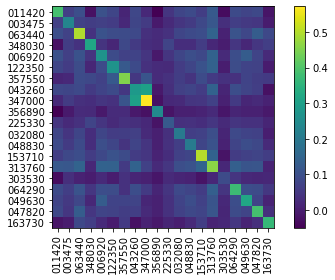

In [24]:
# ÏàòÏùµÎ•†Ïùò Í≥µÎ∂ÑÏÇ∞
from pypfopt import plotting

plotting.plot_covariance(S)

#### ver02> Ï¢ÖÍ∞ÄÏóê Í≤∞Ï∏°Í∞íÏù¥ ÏûàÎäî Ï¢ÖÎ™©ÏùÑ ÏÇ≠Ï†úÌïú df2Î°ú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Íµ¨ÏÑ± ( 12Í∞ú Ï¢ÖÎ™© )

In [25]:
# Calculate the expected annualized returns
# Î≥µÎ¶¨ Ïó∞ÌèâÍ∑† ÏàòÏùµÎ•†
# return (1 + returns).prod() ** (frequency / returns.count()) - 1
mu2 = expected_returns.mean_historical_return(df2) 

# Calculate the annualized sample covariance matrix of the daily asset returns
S2 = risk_models.sample_cov(df2)

In [26]:
mu2

011420   -1.110223e-16
003475    2.500297e-01
063440    9.589725e-02
006920    1.579050e-02
122350    1.135276e-01
043260    1.436814e-01
225330   -1.696296e-02
032080    1.449568e-01
048830    1.380535e-01
064290    8.489805e-01
049630   -1.073683e-01
047820    2.411839e-01
dtype: float64

In [27]:
len(mu2)

12

In [28]:
S2.shape

(12, 12)

In [29]:
len(S2)

12

In [30]:
S2

011420    003475    063440  ...    064290    049630    047820
011420  0.389199  0.067839  0.100413  ...  0.089077  0.078694  0.084398
003475  0.067839  0.232666  0.072384  ...  0.064630  0.053303  0.047889
063440  0.100413  0.072384  0.498424  ...  0.108397  0.082985  0.130910
006920  0.104577  0.068134  0.106014  ...  0.096346  0.130116  0.077987
122350  0.080621  0.059841  0.095137  ...  0.095158  0.074315  0.072146
043260  0.082580  0.080279  0.086739  ...  0.097435  0.077421  0.065090
225330  0.046022  0.023621  0.038365  ...  0.046308  0.038371  0.039466
032080  0.079280  0.045714  0.081410  ...  0.088066  0.074493  0.071570
048830  0.090973  0.057180  0.090404  ...  0.077839  0.096963  0.085453
064290  0.089077  0.064630  0.108397  ...  0.375969  0.096379  0.091970
049630  0.078694  0.053303  0.082985  ...  0.096379  0.316983  0.078034
047820  0.084398  0.047889  0.130910  ...  0.091970  0.078034  0.389635

[12 rows x 12 columns]

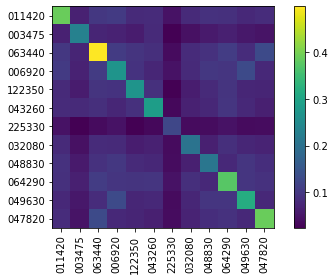

In [31]:
# ÏàòÏùµÎ•†Ïùò Í≥µÎ∂ÑÏÇ∞
from pypfopt import plotting

plotting.plot_covariance(S2)

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî ( Efficient Risk )

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå / df / mu, S / ef, cleaned_weights ( 20Í∞ú Ï¢ÖÎ™© )

In [32]:
!pip install PyPortfolioOpt

In [33]:
import pypfopt
pypfopt.__version__

'1.4.2'

In [34]:
# Efficient_riskÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
vol_limit = 0.3
ef = EfficientFrontier(mu, S)
ef.efficient_risk(vol_limit)
ef.portfolio_performance(verbose=True)

Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06


(0.3370441320257059, 0.2999999999977399, 1.0568137734269811)

In [35]:
# max_sharpeÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
ef.portfolio_performance(verbose=True)

Expected annual return: 71.5%
Annual volatility: 49.3%
Sharpe Ratio: 1.41


(0.7154780588529528, 0.4929372058638349, 1.4108857083209625)

In [36]:
from pypfopt import risk_models, expected_returns
from pypfopt import EfficientFrontier, objective_functions
import cvxpy as cp

# Risk Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ReturnÏùÑ ÏµúÎåÄÎ°ú !
# Í∞êÎãπ Í∞ÄÎä•Ìïú ÏµúÎåÄ Î¶¨Ïä§ÌÅ¨Î•º 0.11 (11 %)Î°ú ÏÑ§Ï†ï
vol_limit = 0.3

ef = EfficientFrontier(mu, S)  # Create the Efficient Frontier Object

weights = ef.efficient_risk(vol_limit)

cleaned_weights = ef.clean_weights()
print(cleaned_weights)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef.portfolio_performance(verbose=True)

OrderedDict([('011420', 0.0), ('003475', 0.17651), ('063440', 0.0), ('348030', 0.0), ('006920', 0.0), ('122350', 0.03108), ('357550', 0.0), ('043260', 0.0), ('347000', 0.10977), ('356890', 0.0), ('225330', 0.21758), ('032080', 0.09659), ('048830', 0.06213), ('153710', 0.0), ('313760', 0.0), ('303530', 0.0), ('064290', 0.24603), ('049630', 0.0), ('047820', 0.0603), ('163730', 0.0)])
Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06


(0.3370441320257059, 0.2999999999977399, 1.0568137734269811)

In [37]:
weights

OrderedDict([('011420', 9.48788e-11),
             ('003475', 0.1765138839605029),
             ('063440', 1.013204e-10),
             ('348030', 1.60439e-11),
             ('006920', 7.11639e-11),
             ('122350', 0.0310815328195173),
             ('357550', 4.66046e-11),
             ('043260', 4.13501e-11),
             ('347000', 0.1097728306550564),
             ('356890', 1.34896e-10),
             ('225330', 0.2175790365694954),
             ('032080', 0.0965930095426039),
             ('048830', 0.0621342296629936),
             ('153710', 1.4805024e-09),
             ('313760', 1.36329e-11),
             ('303530', 2.07839e-11),
             ('064290', 0.2460272860296662),
             ('049630', 5.73486e-11),
             ('047820', 0.0602981886352778),
             ('163730', 4.63702e-11)])

In [38]:
len(weights)

20

In [39]:
cleaned_weights

OrderedDict([('011420', 0.0),
             ('003475', 0.17651),
             ('063440', 0.0),
             ('348030', 0.0),
             ('006920', 0.0),
             ('122350', 0.03108),
             ('357550', 0.0),
             ('043260', 0.0),
             ('347000', 0.10977),
             ('356890', 0.0),
             ('225330', 0.21758),
             ('032080', 0.09659),
             ('048830', 0.06213),
             ('153710', 0.0),
             ('313760', 0.0),
             ('303530', 0.0),
             ('064290', 0.24603),
             ('049630', 0.0),
             ('047820', 0.0603),
             ('163730', 0.0)])

In [40]:
len(cleaned_weights)

20

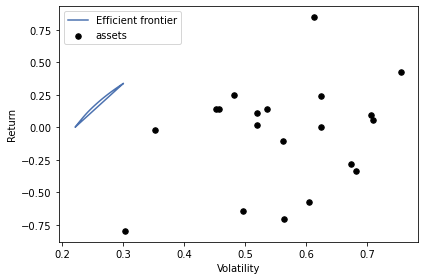

In [41]:
# Ìö®Ïú®Ï†Å Ìà¨ÏûêÏÑ†ÏôÄ Í∞Å Ï¢ÖÎ™©Ïùò ÏàòÏùµÎ•† & Î≥ÄÎèôÏÑ±
import matplotlib.pyplot as plt

# ef = EfficientFrontier(mu, S, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


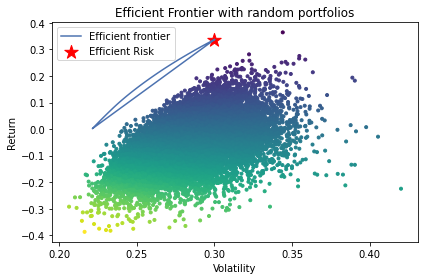

In [42]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit = 0.3
ef.efficient_risk(vol_limit)
ret_tangent, std_tangent, _ = ef.portfolio_performance()  # Í∏∞ÎåÄÏàòÏùµÎ•† , Risk(Î≥ÄÎèôÏÑ±)
ax.scatter(std_tangent, ret_tangent, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w = np.random.dirichlet(np.ones(len(mu)), n_samples) # ÎÇúÏàòÎ°ú 20000ÏÑ∏Ìä∏Ïùò Ìà¨ÏûêÎπÑÏ§ë ÎßåÎì§Í∏∞
rets = w.dot(mu)                                     # Í∏∞ÎåÄÏàòÏùµÎ•†
stds = np.sqrt(np.diag(w @ S @ w.T))                 # Risk(Î≥ÄÎèôÏÑ±)
sharpes = rets / stds                                # ÏÉ§ÌîÑÎπÑÏú®

ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [43]:
# Max.Sharpe RatioÎ°ú ÏµúÏ†ÅÌôîÌïú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±, ÏÉ§ÌîÑÎπÑÏú®
ef.portfolio_performance(verbose=True)

Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06


(0.33704413024599633, 0.29999999993250587, 1.0568137677244167)

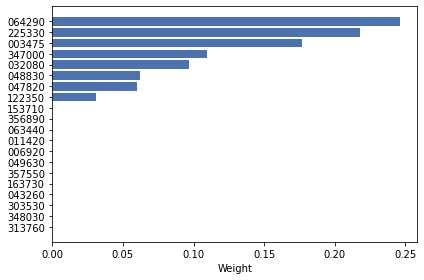

In [44]:
# Ï¢ÖÎ™©Î≥Ñ Ìà¨ÏûêÎπÑÏ§ë
plotting.plot_weights(weights, ax=None)

#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú / df2 / mu2, S2 / ef2, cleaned_weights2 ( 12Í∞ú Ï¢ÖÎ™© )

In [45]:
# Efficient_riskÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)
ef2.efficient_risk(vol_limit2)
ef2.portfolio_performance(verbose=True)

Expected annual return: 30.4%
Annual volatility: 30.0%
Sharpe Ratio: 0.95


(0.3035474651412203, 0.30000000005047844, 0.9451582169783671)

In [46]:
# max_sharpeÎ°ú ÏµúÏ†ÅÌôî ÌñàÏùÑÎïåÏùò Í≤∞Í≥º ÌôïÏù∏
ef2 = EfficientFrontier(mu2, S2)
ef2.max_sharpe()
ef2.portfolio_performance(verbose=True)

Expected annual return: 75.3%
Annual volatility: 53.7%
Sharpe Ratio: 1.36


(0.7526643158706008, 0.5368547687322833, 1.3647346704225012)

In [47]:
# Risk Î≤îÏúÑ ÎÇ¥ÏóêÏÑú ReturnÏùÑ ÏµúÎåÄÎ°ú !
# Í∞êÎãπ Í∞ÄÎä•Ìïú ÏµúÎåÄ Î¶¨Ïä§ÌÅ¨Î•º 0.151 (15.1 %)Î°ú ÏÑ§Ï†ï
vol_limit2 = 0.3
ef2 = EfficientFrontier(mu2, S2)  # Create the Efficient Frontier Object

weights2 = ef2.efficient_risk(vol_limit2)

# clean_weights()-> rounds the weights and clips near-zeros.
# weights < 0.0001 => clean_weights = 0
# cleaned_weights => ÏÜåÏà´Ï†ê 5ÏûêÎ¶¨ÍπåÏßÄ ÌëúÏãú
cleaned_weights2 = ef2.clean_weights()
print(cleaned_weights2)

# calculates the expected return, volatility and Sharpe ratio for the optimized portfolio.
ef2.portfolio_performance(verbose=True)

OrderedDict([('011420', 0.0), ('003475', 0.20148), ('063440', 0.0), ('006920', 0.0), ('122350', 0.04063), ('043260', 0.01746), ('225330', 0.25259), ('032080', 0.10092), ('048830', 0.07924), ('064290', 0.24771), ('049630', 0.0), ('047820', 0.05997)])
Expected annual return: 30.4%
Annual volatility: 30.0%
Sharpe Ratio: 0.95


(0.3035474651412203, 0.30000000005047844, 0.9451582169783671)

In [48]:
weights2

OrderedDict([('011420', 6.28535e-11),
             ('003475', 0.2014785167145681),
             ('063440', 7.46532e-11),
             ('006920', 5.91502e-11),
             ('122350', 0.040631616653312),
             ('043260', 0.017456535768528),
             ('225330', 0.2525881578478024),
             ('032080', 0.1009240476894064),
             ('048830', 0.0792410872663569),
             ('064290', 0.247712624760137),
             ('049630', 4.16891e-11),
             ('047820', 0.0599674130615386)])

In [49]:
len(weights2)

12

In [50]:
cleaned_weights2

OrderedDict([('011420', 0.0),
             ('003475', 0.20148),
             ('063440', 0.0),
             ('006920', 0.0),
             ('122350', 0.04063),
             ('043260', 0.01746),
             ('225330', 0.25259),
             ('032080', 0.10092),
             ('048830', 0.07924),
             ('064290', 0.24771),
             ('049630', 0.0),
             ('047820', 0.05997)])

In [51]:
len(cleaned_weights2)

12

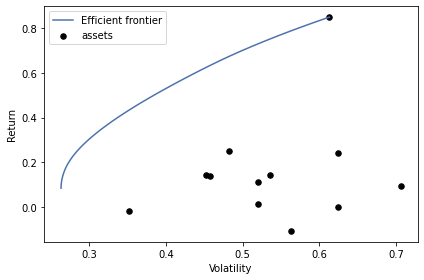

In [52]:
# Ìö®Ïú®Ï†Å Ìà¨ÏûêÏÑ†ÏôÄ Í∞Å Ï¢ÖÎ™©Ïùò ÏàòÏùµÎ•† & Î≥ÄÎèôÏÑ±
import matplotlib.pyplot as plt

ef2 = EfficientFrontier(mu2, S2, solver='SCS')

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=True)
plt.legend(loc='best')
plt.show()

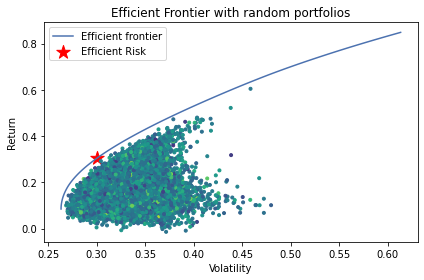

In [53]:
# Show Efficient Frontier
fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef2, ax=ax, show_assets=False)

# Find the tangency portfolio
vol_limit2 = 0.3
ef2.efficient_risk(vol_limit2)
ret_tangent2, std_tangent2, _ = ef2.portfolio_performance()  # Í∏∞ÎåÄÏàòÏùµÎ•† , Risk(Î≥ÄÎèôÏÑ±)
ax.scatter(std_tangent2, ret_tangent2, marker="*", s=200, c="r", label="Efficient Risk")

# Generate random portfolios
n_samples = 20000
w2 = np.random.dirichlet(np.ones(len(mu2)), n_samples) # ÎÇúÏàòÎ°ú 20000ÏÑ∏Ìä∏Ïùò Ìà¨ÏûêÎπÑÏ§ë ÎßåÎì§Í∏∞
rets2 = w2.dot(mu2)                                     # Í∏∞ÎåÄÏàòÏùµÎ•†
stds2 = np.sqrt(np.diag(w2 @ S2 @ w2.T))                 # Risk(Î≥ÄÎèôÏÑ±)
sharpes2 = rets2 / stds2                                # ÏÉ§ÌîÑÎπÑÏú®

ax.scatter(stds2, rets2, marker=".", c=sharpes, cmap="viridis_r")

# Output
ax.set_title("Efficient Frontier with random portfolios")
ax.legend(loc='best')
plt.tight_layout()
plt.savefig("ef_scatter.png", dpi=200)
plt.show()

In [54]:
# Efficient RiskÎ°ú ÏµúÏ†ÅÌôîÌïú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±, ÏÉ§ÌîÑÎπÑÏú®
ef2.portfolio_performance(verbose=True)

Expected annual return: 30.3%
Annual volatility: 30.0%
Sharpe Ratio: 0.95


(0.30349499759960474, 0.29997685148372566, 0.9450562474984338)

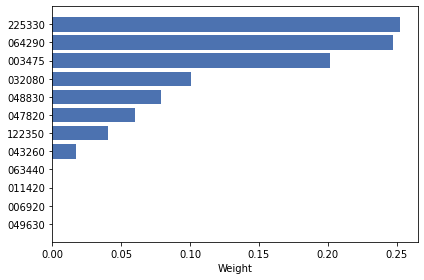

In [55]:
# Ï¢ÖÎ™©Î≥Ñ Ìà¨ÏûêÎπÑÏ§ë
plotting.plot_weights(weights2, ax=None)

### Ìà¨ÏûêÍ∏àÏï°Í≥º Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÎπÑÏ§ëÏóê ÎßûÏ∂îÏñ¥ ÏàòÎüâ Ìï†Îãπ

In [56]:
!pip install pulp

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå / df / mu, S / ef, cleaned_weights ( 20Í∞ú Ï¢ÖÎ™© )

In [57]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# Ìà¨ÏûêÍ∏àÏï° (Îã®ÏúÑ: KRW)
portfolio_val = 15000000

latest_prices = get_latest_prices(df)

weights = cleaned_weights

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=portfolio_val)

allocation, leftover = da.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation)
print('Funds Remaining: ', leftover, ' KRW')

rmse = da._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'003475': 597, '122350': 111, '347000': 84, '225330': 431, '032080': 494, '048830': 310, '064290': 170, '047820': 345}
Funds Remaining:  215.0  KRW
Allocation has RMSE: 0.000


In [58]:
allocation

{'003475': 597,
 '032080': 494,
 '047820': 345,
 '048830': 310,
 '064290': 170,
 '122350': 111,
 '225330': 431,
 '347000': 84}

In [59]:
len(allocation)

8

#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå / df2 / mu2, S2 / ef2, cleaned_weights2 /  ( 12Í∞ú Ï¢ÖÎ™© )

In [60]:
# Get the discrete allocation of each sharpe per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

# Ìà¨ÏûêÍ∏àÏï° (Îã®ÏúÑ: KRW)
portfolio_val = 15000000

latest_prices2 = get_latest_prices(df2)

weights2 = cleaned_weights2

da2 = DiscreteAllocation(weights2, latest_prices2, total_portfolio_value=portfolio_val)

allocation2, leftover2 = da2.lp_portfolio(verbose=False)

print('Discrete Allocaion: ', allocation2)
print('Funds Remaining: ', leftover2, ' KRW')

rmse2 = da2._allocation_rmse_error(verbose=False)

Discrete Allocaion:  {'003475': 681, '122350': 144, '043260': 154, '225330': 500, '032080': 516, '048830': 395, '064290': 172, '047820': 342}
Funds Remaining:  165.0  KRW
Allocation has RMSE: 0.000


In [61]:
allocation2

{'003475': 681,
 '032080': 516,
 '043260': 154,
 '047820': 342,
 '048830': 395,
 '064290': 172,
 '122350': 144,
 '225330': 500}

In [62]:
len(allocation2)

8

### Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Í≤∞Í≥ºÎ°ú Î≥¥Ïó¨Ï§Ñ Î≥ÄÏàò Ï†ÄÏû•

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†úÌïòÏßÄ ÏïäÏùå ( 20Í∞ú Ï¢ÖÎ™© )

In [63]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
inv_total_price = {}

for i in allocation.keys():
  inv_total_price[i] = latest_prices.loc[i]*allocation[i]
inv_total_price

{'003475': 2647695.0,
 '032080': 1447420.0,
 '047820': 905625.0,
 '048830': 933100.0,
 '064290': 3680500.0,
 '122350': 467865.0,
 '225330': 3266980.0,
 '347000': 1650600.0}

In [64]:
# Ï¥ù Ìà¨ÏûêÍ∏àÏï°
investment = 0

for i in inv_total_price.values():
    investment += i
print(investment)

14999785.0


In [65]:
portfolio_val-leftover

14999785.0

In [66]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë
inv_total_weight = {}

for i in allocation.keys():
  inv_total_weight[i] = inv_total_price[i]/investment
inv_total_weight

{'003475': 0.1765155300559308,
 '032080': 0.09649604977671347,
 '047820': 0.06037586538740389,
 '048830': 0.062207558308335756,
 '064290': 0.24537018363929883,
 '122350': 0.03119144707740811,
 '225330': 0.21780178849230172,
 '347000': 0.11004157726260744}

In [67]:
# Ìà¨ÏûêÎπÑÏ§ëÏùò Ìï©Í≥Ñ
investment_w = 0

for i in inv_total_weight.values():
    investment_w += i
print(investment_w)

1.0


In [68]:
# Í≤∞Í≥ºÍ∞íÏúºÎ°ú Î∂àÎü¨Ïò¨ Í∞íÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
name_list = []                    # Ï¢ÖÎ™©Î™Ö(ÌöåÏÇ¨Ïù¥Î¶Ñ)
total_price_stock =[]             # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
total_weight_stock = []           # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë

for i in allocation.keys(): # i = Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïóê Ìï†ÎãπÎêú Ï¢ÖÎ™©Ïùò Ï¢ÖÎ™©ÏΩîÎìú
    name_list.append(code_name_dict.get(i))
    total_price_stock.append(inv_total_price.get(i))
    total_weight_stock.append(inv_total_weight.get(i))

In [69]:
name_list

['Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞', 'ÏÇºÍ∏∞', 'ÏÑºÏΩî', 'Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ', 'ÏïÑÏ¶àÌÖçWB', 'ÏóîÌîºÏºÄÏù¥', 'Ïù∏ÌÖçÌîåÎü¨Ïä§', 'Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥']

In [70]:
total_price_stock

[2647695.0,
 467865.0,
 1650600.0,
 3266980.0,
 1447420.0,
 933100.0,
 3680500.0,
 905625.0]

In [71]:
total_weight_stock

[0.1765155300559308,
 0.03119144707740811,
 0.11004157726260744,
 0.21780178849230172,
 0.09649604977671347,
 0.062207558308335756,
 0.24537018363929883,
 0.06037586538740389]

In [72]:
# Get the discrete allocation values
discrete_allocation_list = []
for symbol in allocation:
  discrete_allocation_list.append(allocation.get(symbol))

In [73]:
discrete_allocation_list

[597, 111, 84, 431, 494, 310, 170, 345]

In [74]:
# Create a dataframe for the portfolio
portfolio_df = pd.DataFrame(columns = ['Ï¢ÖÎ™©Î™Ö','Ï¢ÖÎ™©ÏΩîÎìú','ÏàòÎüâ(Ï£º)', 'Ìà¨ÏûêÍ∏àÏï°(Ïõê)','Ìà¨ÏûêÎπÑÏ§ë'])
portfolio_df

Empty DataFrame
Columns: [Ï¢ÖÎ™©Î™Ö, Ï¢ÖÎ™©ÏΩîÎìú, ÏàòÎüâ(Ï£º), Ìà¨ÏûêÍ∏àÏï°(Ïõê), Ìà¨ÏûêÎπÑÏ§ë]
Index: []

In [75]:
# portfolio_df['Company_name'] = company_name
portfolio_df['Ï¢ÖÎ™©Î™Ö'] = name_list
portfolio_df['Ï¢ÖÎ™©ÏΩîÎìú'] = allocation
portfolio_df['ÏàòÎüâ(Ï£º)'] = discrete_allocation_list
portfolio_df['Ìà¨ÏûêÍ∏àÏï°(Ïõê)'] = total_price_stock
portfolio_df['Ìà¨ÏûêÎπÑÏ§ë'] = total_weight_stock

In [76]:
portfolio_df

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)    Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0  Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475    597  2647695.0  0.176516
1      ÏÇºÍ∏∞  122350    111   467865.0  0.031191
2      ÏÑºÏΩî  347000     84  1650600.0  0.110042
3  Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330    431  3266980.0  0.217802
4   ÏïÑÏ¶àÌÖçWB  032080    494  1447420.0  0.096496
5    ÏóîÌîºÏºÄÏù¥  048830    310   933100.0  0.062208
6   Ïù∏ÌÖçÌîåÎü¨Ïä§  064290    170  3680500.0  0.245370
7  Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820    345   905625.0  0.060376

In [77]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted = portfolio_df.sort_values('Ìà¨ÏûêÎπÑÏ§ë', ascending = False)
portfolio_df_sorted = portfolio_df_sorted.reset_index(drop=True)
portfolio_df_sorted

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)    Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0   Ïù∏ÌÖçÌîåÎü¨Ïä§  064290    170  3680500.0  0.245370
1  Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330    431  3266980.0  0.217802
2  Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475    597  2647695.0  0.176516
3      ÏÑºÏΩî  347000     84  1650600.0  0.110042
4   ÏïÑÏ¶àÌÖçWB  032080    494  1447420.0  0.096496
5    ÏóîÌîºÏºÄÏù¥  048830    310   933100.0  0.062208
6  Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820    345   905625.0  0.060376
7      ÏÇºÍ∏∞  122350    111   467865.0  0.031191

### Ìà¨Ïûê Í∏àÏï°Ïóê Îî∞Îùº ÏµúÏ†ÅÌôîÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò Ï¢ÖÎ™©Î≥Ñ ÏàòÎüâ

In [78]:
portfolio_df_sorted.loc["Ìï©Í≥Ñ",2:] = portfolio_df_sorted.sum()
portfolio_df_sorted

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú   ÏàòÎüâ(Ï£º)     Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0    Ïù∏ÌÖçÌîåÎü¨Ïä§  064290   170.0   3680500.0  0.245370
1   Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330   431.0   3266980.0  0.217802
2   Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475   597.0   2647695.0  0.176516
3       ÏÑºÏΩî  347000    84.0   1650600.0  0.110042
4    ÏïÑÏ¶àÌÖçWB  032080   494.0   1447420.0  0.096496
5     ÏóîÌîºÏºÄÏù¥  048830   310.0    933100.0  0.062208
6   Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820   345.0    905625.0  0.060376
7       ÏÇºÍ∏∞  122350   111.0    467865.0  0.031191
Ìï©Í≥Ñ     NaN     NaN  2542.0  14999785.0  1.000000

#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú ( 12Í∞ú Ï¢ÖÎ™© )

In [79]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
inv_total_price2 = {}

for i in allocation2.keys():
  inv_total_price2[i] = latest_prices2.loc[i]*allocation2[i]
inv_total_price2

{'003475': 3020235,
 '032080': 1511880,
 '043260': 260260,
 '047820': 897750,
 '048830': 1188950,
 '064290': 3723800,
 '122350': 606960,
 '225330': 3790000}

In [80]:
# Ï¥ù Ìà¨ÏûêÍ∏àÏï°
investment2 = 0

for i in inv_total_price2.values():
    investment2 += i
print(investment2)

14999835


In [81]:
portfolio_val-leftover2

14999835.0

In [82]:
# Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë
inv_total_weight2 = {}

for i in allocation2.keys():
  inv_total_weight2[i] = inv_total_price2[i]/investment2
inv_total_weight2

{'003475': 0.2013512148633635,
 '032080': 0.10079310872419596,
 '043260': 0.017350857526099453,
 '047820': 0.05985065835724193,
 '048830': 0.07926420523959096,
 '064290': 0.24825606415003898,
 '122350': 0.0404644451088962,
 '225330': 0.252669446030573}

In [83]:
# Ìà¨ÏûêÎπÑÏ§ëÏùò Ìï©Í≥Ñ
investment_w2 = 0

for i in inv_total_weight2.values():
    investment_w2 += i
print(investment_w2)

1.0


In [84]:
# Í≤∞Í≥ºÍ∞íÏúºÎ°ú Î∂àÎü¨Ïò¨ Í∞íÏùÑ Î¶¨Ïä§Ìä∏Î°ú Ï†ÄÏû•
name_list2 = []                    # Ï¢ÖÎ™©Î™Ö(ÌöåÏÇ¨Ïù¥Î¶Ñ)
total_price_stock2 =[]             # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê Í∏àÏï°
total_weight_stock2 = []           # Í∞Å Ï¢ÖÎ™©Î≥Ñ Ïã§Ï†ú Ìà¨Ïûê ÎπÑÏ§ë

for i in allocation2.keys(): # i = Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïóê Ìï†ÎãπÎêú Ï¢ÖÎ™©Ïùò Ï¢ÖÎ™©ÏΩîÎìú
    name_list2.append(code_name_dict.get(i))
    total_price_stock2.append(inv_total_price2.get(i))
    total_weight_stock2.append(inv_total_weight2.get(i))

In [85]:
name_list2

['Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞', 'ÏÇºÍ∏∞', 'ÏÑ±Ìò∏Ï†ÑÏûê', 'Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ', 'ÏïÑÏ¶àÌÖçWB', 'ÏóîÌîºÏºÄÏù¥', 'Ïù∏ÌÖçÌîåÎü¨Ïä§', 'Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥']

In [86]:
total_price_stock2

[3020235, 606960, 260260, 3790000, 1511880, 1188950, 3723800, 897750]

In [87]:
total_weight_stock2

[0.2013512148633635,
 0.0404644451088962,
 0.017350857526099453,
 0.252669446030573,
 0.10079310872419596,
 0.07926420523959096,
 0.24825606415003898,
 0.05985065835724193]

In [88]:
# Get the discrete allocation values
discrete_allocation_list2 = []
for symbol in allocation2:
  discrete_allocation_list2.append(allocation2.get(symbol))

In [89]:
discrete_allocation_list2

[681, 144, 154, 500, 516, 395, 172, 342]

In [90]:
# Create a dataframe for the portfolio
portfolio_df2 = pd.DataFrame(columns = ['Ï¢ÖÎ™©Î™Ö','Ï¢ÖÎ™©ÏΩîÎìú','ÏàòÎüâ(Ï£º)', 'Ìà¨ÏûêÍ∏àÏï°(Ïõê)','Ìà¨ÏûêÎπÑÏ§ë'])
portfolio_df2

Empty DataFrame
Columns: [Ï¢ÖÎ™©Î™Ö, Ï¢ÖÎ™©ÏΩîÎìú, ÏàòÎüâ(Ï£º), Ìà¨ÏûêÍ∏àÏï°(Ïõê), Ìà¨ÏûêÎπÑÏ§ë]
Index: []

In [91]:
# portfolio_df['Company_name'] = company_name
portfolio_df2['Ï¢ÖÎ™©Î™Ö'] = name_list2
portfolio_df2['Ï¢ÖÎ™©ÏΩîÎìú'] = allocation2
portfolio_df2['ÏàòÎüâ(Ï£º)'] = discrete_allocation_list2
portfolio_df2['Ìà¨ÏûêÍ∏àÏï°(Ïõê)'] = total_price_stock2
portfolio_df2['Ìà¨ÏûêÎπÑÏ§ë'] = total_weight_stock2

In [92]:
portfolio_df2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)  Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0  Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475    681  3020235  0.201351
1      ÏÇºÍ∏∞  122350    144   606960  0.040464
2    ÏÑ±Ìò∏Ï†ÑÏûê  043260    154   260260  0.017351
3  Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330    500  3790000  0.252669
4   ÏïÑÏ¶àÌÖçWB  032080    516  1511880  0.100793
5    ÏóîÌîºÏºÄÏù¥  048830    395  1188950  0.079264
6   Ïù∏ÌÖçÌîåÎü¨Ïä§  064290    172  3723800  0.248256
7  Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820    342   897750  0.059851

In [93]:
# Sort by allocation & Show the portfolio
portfolio_df_sorted2 = portfolio_df2.sort_values('Ìà¨ÏûêÎπÑÏ§ë', ascending = False)
portfolio_df_sorted2 = portfolio_df_sorted2.reset_index(drop=True)
portfolio_df_sorted2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú  ÏàòÎüâ(Ï£º)  Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0  Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330    500  3790000  0.252669
1   Ïù∏ÌÖçÌîåÎü¨Ïä§  064290    172  3723800  0.248256
2  Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475    681  3020235  0.201351
3   ÏïÑÏ¶àÌÖçWB  032080    516  1511880  0.100793
4    ÏóîÌîºÏºÄÏù¥  048830    395  1188950  0.079264
5  Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820    342   897750  0.059851
6      ÏÇºÍ∏∞  122350    144   606960  0.040464
7    ÏÑ±Ìò∏Ï†ÑÏûê  043260    154   260260  0.017351

### Ìà¨Ïûê Í∏àÏï°Ïóê Îî∞Îùº ÏµúÏ†ÅÌôîÎêú Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò Ï¢ÖÎ™©Î≥Ñ ÏàòÎüâ

In [94]:
portfolio_df_sorted2.loc["Ìï©Í≥Ñ",2:] = portfolio_df_sorted2.sum()
portfolio_df_sorted2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú   ÏàòÎüâ(Ï£º)     Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0   Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330   500.0   3790000.0  0.252669
1    Ïù∏ÌÖçÌîåÎü¨Ïä§  064290   172.0   3723800.0  0.248256
2   Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475   681.0   3020235.0  0.201351
3    ÏïÑÏ¶àÌÖçWB  032080   516.0   1511880.0  0.100793
4     ÏóîÌîºÏºÄÏù¥  048830   395.0   1188950.0  0.079264
5   Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820   342.0    897750.0  0.059851
6       ÏÇºÍ∏∞  122350   144.0    606960.0  0.040464
7     ÏÑ±Ìò∏Ï†ÑÏûê  043260   154.0    260260.0  0.017351
Ìï©Í≥Ñ     NaN     NaN  2904.0  14999835.0  1.000000

# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§Ïùò ÏàòÏùµÎ•†Í≥º Î≥ÄÎèôÏÑ±ÏùÑ Î≤§ÏπòÎßàÌÅ¨ÏßÄÏàò(KOSPI)ÏôÄ ÎπÑÍµê

#### ver01> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú ( 20Í∞ú Ï¢ÖÎ™© )

In [95]:
df

011420  003475  063440   348030  ...  064290  049630  047820   163730
Date                                         ...                                 
2018-07-19    1885    2305    2110      NaN  ...    3570    1472    1393      NaN
2018-07-20    1880    2285    2000      NaN  ...    3540    1434    1398      NaN
2018-07-23    1855    2305    1900      NaN  ...    3335    1351    1302      NaN
2018-07-24    1850    2325    1960      NaN  ...    3435    1458    1316      NaN
2018-07-25    1820    2320    1925      NaN  ...    3425    1393    1288      NaN
...            ...     ...     ...      ...  ...     ...     ...     ...      ...
2021-07-13    1950    4650    2775  20900.0  ...   22200    1030    2460  19900.0
2021-07-14    1900    4580    2775  20600.0  ...   21900    1050    2500  19800.0
2021-07-15    1895    4580    2765  20750.0  ...   22600    1100    2470  19750.0
2021-07-16    1945    4535    2780  20950.0  ...   22200    1085    2515  19550.0
2021-07-19    1885    4435    2760  20750.0  ...   21650    1055    2625  19600.0

[740 rows x 20 columns]

In [96]:
cleaned_weights

OrderedDict([('011420', 0.0),
             ('003475', 0.17651),
             ('063440', 0.0),
             ('348030', 0.0),
             ('006920', 0.0),
             ('122350', 0.03108),
             ('357550', 0.0),
             ('043260', 0.0),
             ('347000', 0.10977),
             ('356890', 0.0),
             ('225330', 0.21758),
             ('032080', 0.09659),
             ('048830', 0.06213),
             ('153710', 0.0),
             ('313760', 0.0),
             ('303530', 0.0),
             ('064290', 0.24603),
             ('049630', 0.0),
             ('047820', 0.0603),
             ('163730', 0.0)])

In [97]:
len(cleaned_weights)

20

In [98]:
# Í∞Å ÏùºÏûêÎ≥Ñ, Ï¢ÖÎ™©Î≥Ñ Ï¢ÖÍ∞ÄÏóê Ìï¥Îãπ weightsÎ•º Í≥±Ìï¥Ï£ºÍ∏∞
for i, weight in cleaned_weights.items():
    df[i] = df[i]*weight

In [99]:
df

011420     003475  063440  ...  049630    047820  163730
Date                                   ...                          
2018-07-19     0.0  406.85555     0.0  ...     0.0   83.9979     NaN
2018-07-20     0.0  403.32535     0.0  ...     0.0   84.2994     NaN
2018-07-23     0.0  406.85555     0.0  ...     0.0   78.5106     NaN
2018-07-24     0.0  410.38575     0.0  ...     0.0   79.3548     NaN
2018-07-25     0.0  409.50320     0.0  ...     0.0   77.6664     NaN
...            ...        ...     ...  ...     ...       ...     ...
2021-07-13     0.0  820.77150     0.0  ...     0.0  148.3380     0.0
2021-07-14     0.0  808.41580     0.0  ...     0.0  150.7500     0.0
2021-07-15     0.0  808.41580     0.0  ...     0.0  148.9410     0.0
2021-07-16     0.0  800.47285     0.0  ...     0.0  151.6545     0.0
2021-07-19     0.0  782.82185     0.0  ...     0.0  158.2875     0.0

[740 rows x 20 columns]

In [100]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÎ™©Ïùò (Ï¢ÖÍ∞Ä*ÎπÑÏ§ë) Ìï©Í≥ÑÎ•º PortÏó¥Ïóê Ï†ÄÏû•
df['Port'] = df.sum(axis = 1)
df

011420     003475  063440  ...    047820  163730         Port
Date                                   ...                               
2018-07-19     0.0  406.85555     0.0  ...   83.9979     NaN   3517.13425
2018-07-20     0.0  403.32535     0.0  ...   84.2994     NaN   3496.50005
2018-07-23     0.0  406.85555     0.0  ...   78.5106     NaN   3395.89600
2018-07-24     0.0  410.38575     0.0  ...   79.3548     NaN   3460.54490
2018-07-25     0.0  409.50320     0.0  ...   77.6664     NaN   3447.62705
...            ...        ...     ...  ...       ...     ...          ...
2021-07-13     0.0  820.77150     0.0  ...  148.3380     0.0  10754.30095
2021-07-14     0.0  808.41580     0.0  ...  150.7500     0.0  10666.35910
2021-07-15     0.0  808.41580     0.0  ...  148.9410     0.0  10981.69595
2021-07-16     0.0  800.47285     0.0  ...  151.6545     0.0  10888.81010
2021-07-19     0.0  782.82185     0.0  ...  158.2875     0.0  10674.91795

[740 rows x 21 columns]

In [101]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÍ∞ÄÏùò Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ portfolioÎùºÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
portfolio = df[['Port']].pct_change()
portfolio

Port
Date                
2018-07-19       NaN
2018-07-20 -0.005867
2018-07-23 -0.028773
2018-07-24  0.019037
2018-07-25 -0.003733
...              ...
2021-07-13  0.011980
2021-07-14 -0.008177
2021-07-15  0.029564
2021-07-16 -0.008458
2021-07-19 -0.019643

[740 rows x 1 columns]

In [102]:
# ÏΩîÏä§ÌîºÏßÄÏàò Î∂àÎü¨Ïò§Í∏∞
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

Close
Date               
2018-07-19  2282.29
2018-07-20  2289.19
2018-07-23  2269.31
2018-07-24  2280.20
2018-07-25  2273.03
...             ...
2021-07-13  3271.38
2021-07-14  3264.81
2021-07-15  3286.22
2021-07-16  3276.91
2021-07-19  3244.04

[740 rows x 1 columns]

In [103]:
# ÏΩîÏä§ÌîºÏßÄÏàòÏùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) Íµ¨ÌïòÍ∏∞
# Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (ÎãπÏùºÍ∞ÄÍ≤©-Ï†ÑÏùºÍ∞ÄÍ≤©) / Ï†ÑÏùºÍ∞ÄÍ≤©
# 7/20Ïùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (7/20 Í∞ÄÍ≤©-7-19 Í∞ÄÍ≤©) / 7/19 Í∞ÄÍ≤©
kospi_pct = kospi.pct_change()
kospi_pct

Close
Date                
2018-07-19       NaN
2018-07-20  0.003023
2018-07-23 -0.008684
2018-07-24  0.004799
2018-07-25 -0.003144
...              ...
2021-07-13  0.007673
2021-07-14 -0.002008
2021-07-15  0.006558
2021-07-16 -0.002833
2021-07-19 -0.010031

[740 rows x 1 columns]

In [104]:
# ÏΩîÏä§ÌîºÏôÄ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ìï©ÏπòÍ∏∞
result = kospi_pct.join(portfolio)
result

Close      Port
Date                          
2018-07-19       NaN       NaN
2018-07-20  0.003023 -0.005867
2018-07-23 -0.008684 -0.028773
2018-07-24  0.004799  0.019037
2018-07-25 -0.003144 -0.003733
...              ...       ...
2021-07-13  0.007673  0.011980
2021-07-14 -0.002008 -0.008177
2021-07-15  0.006558  0.029564
2021-07-16 -0.002833 -0.008458
2021-07-19 -0.010031 -0.019643

[740 rows x 2 columns]

In [105]:
# 1Ïó¥ÏùÑ 0ÏúºÎ°ú 
result.iloc[0] = 0
result

Close      Port
Date                          
2018-07-19  0.000000  0.000000
2018-07-20  0.003023 -0.005867
2018-07-23 -0.008684 -0.028773
2018-07-24  0.004799  0.019037
2018-07-25 -0.003144 -0.003733
...              ...       ...
2021-07-13  0.007673  0.011980
2021-07-14 -0.002008 -0.008177
2021-07-15  0.006558  0.029564
2021-07-16 -0.002833 -0.008458
2021-07-19 -0.010031 -0.019643

[740 rows x 2 columns]

In [106]:
# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
result.columns = ['KOSPI', 'PORTFOLIO']
result

KOSPI  PORTFOLIO
Date                           
2018-07-19  0.000000   0.000000
2018-07-20  0.003023  -0.005867
2018-07-23 -0.008684  -0.028773
2018-07-24  0.004799   0.019037
2018-07-25 -0.003144  -0.003733
...              ...        ...
2021-07-13  0.007673   0.011980
2021-07-14 -0.002008  -0.008177
2021-07-15  0.006558   0.029564
2021-07-16 -0.002833  -0.008458
2021-07-19 -0.010031  -0.019643

[740 rows x 2 columns]

In [107]:
# 1ÏóêÏÑú ÏãúÏûëÌï¥ÏÑú, Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏàòÏπòÌôîÌïòÍ∏∞
wealth = (1+result).cumprod()
wealth

KOSPI  PORTFOLIO
Date                           
2018-07-19  1.000000   1.000000
2018-07-20  1.003023   0.994133
2018-07-23  0.994313   0.965529
2018-07-24  0.999084   0.983910
2018-07-25  0.995943   0.980238
...              ...        ...
2021-07-13  1.433376   3.057689
2021-07-14  1.430497   3.032685
2021-07-15  1.439878   3.122342
2021-07-16  1.435799   3.095932
2021-07-19  1.421397   3.035118

[740 rows x 2 columns]

## ÏãúÍ∞ÅÌôî

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


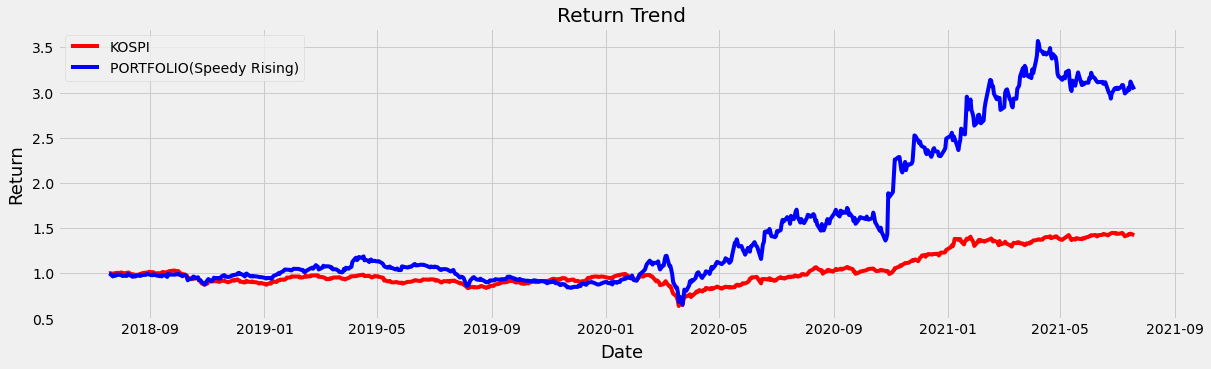

In [108]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ÏôÄ KOSPI ÏßÄÏàòÏùò 'ÎàÑÏ†Å ÏàòÏùµÎ•† Ï∂îÏù¥'Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµê

# matplotlib.pyplot Ïä§ÌÉÄÏùºÏãúÌä∏ ÏÑ§Ï†ï
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth.index, wealth.KOSPI , 'r', label='KOSPI')
plt.plot(wealth.index, wealth.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

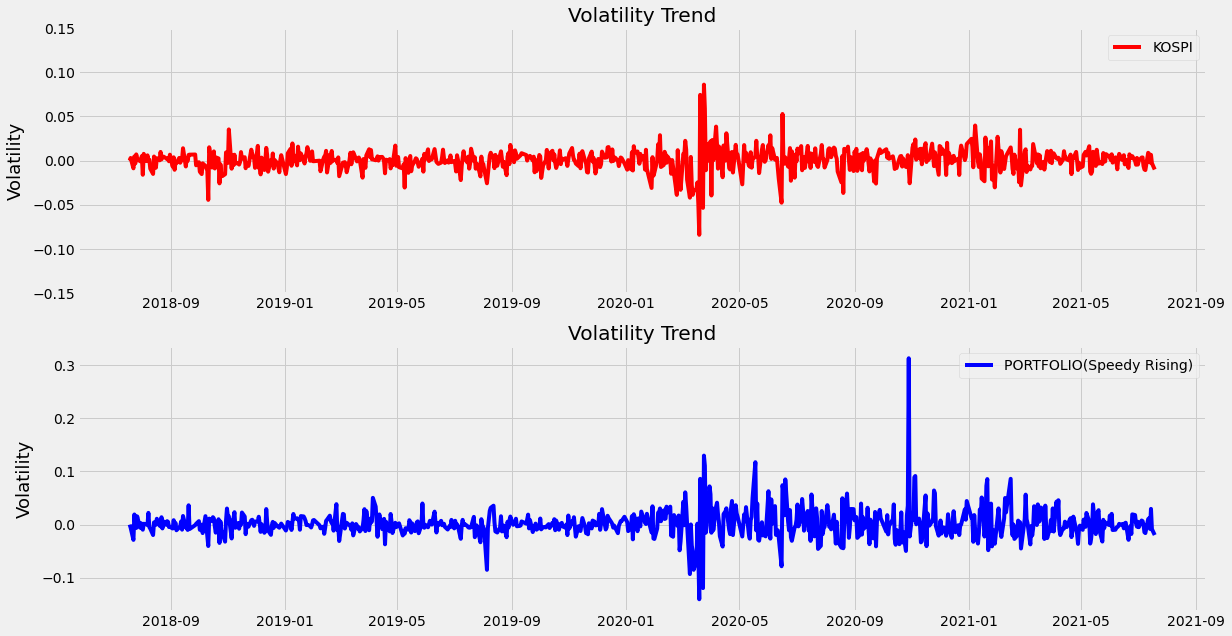

In [109]:
# Î≥ÄÎèôÎ•† ÎπÑÍµê
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result.index, result.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result.index, result.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
# plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [110]:
print('----- Speedy rising portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover, ' KRW')

# Show Portfolio performance
ef.portfolio_performance(verbose=True)
rmse = da._allocation_rmse_error(verbose=False)

----- Speedy rising portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  215.0  KRW
Expected annual return: 33.7%
Annual volatility: 30.0%
Sharpe Ratio: 1.06
Allocation has RMSE: 0.000


#### ver02> Í≤∞Ï∏°Í∞í ÏÇ≠Ï†ú ( 12Í∞ú Ï¢ÖÎ™© )

In [111]:
df2

011420  003475  063440  006920  ...  048830  064290  049630  047820
Date                                        ...                                
2018-07-19    1885    2305    2110    5530  ...    2060    3570    1472    1393
2018-07-20    1880    2285    2000    5540  ...    2050    3540    1434    1398
2018-07-23    1855    2305    1900    5180  ...    1960    3335    1351    1302
2018-07-24    1850    2325    1960    5450  ...    2015    3435    1458    1316
2018-07-25    1820    2320    1925    5530  ...    1980    3425    1393    1288
...            ...     ...     ...     ...  ...     ...     ...     ...     ...
2021-07-13    1950    4650    2775    6000  ...    2340   22200    1030    2460
2021-07-14    1900    4580    2775    5970  ...    2375   21900    1050    2500
2021-07-15    1895    4580    2765    5970  ...    3085   22600    1100    2470
2021-07-16    1945    4535    2780    5990  ...    3065   22200    1085    2515
2021-07-19    1885    4435    2760    5790  ...    3010   21650    1055    2625

[740 rows x 12 columns]

In [112]:
cleaned_weights2

OrderedDict([('011420', 0.0),
             ('003475', 0.20148),
             ('063440', 0.0),
             ('006920', 0.0),
             ('122350', 0.04063),
             ('043260', 0.01746),
             ('225330', 0.25259),
             ('032080', 0.10092),
             ('048830', 0.07924),
             ('064290', 0.24771),
             ('049630', 0.0),
             ('047820', 0.05997)])

In [113]:
len(cleaned_weights2)

12

In [114]:
# Í∞Å ÏùºÏûêÎ≥Ñ, Ï¢ÖÎ™©Î≥Ñ Ï¢ÖÍ∞ÄÏóê Ìï¥Îãπ weightsÎ•º Í≥±Ìï¥Ï£ºÍ∏∞
for i, weight in cleaned_weights2.items():
    df2[i] = df2[i]*weight

In [115]:
df2

011420    003475  063440  ...      064290  049630     047820
Date                                  ...                               
2018-07-19     0.0  464.4114     0.0  ...   884.32470     0.0   83.53821
2018-07-20     0.0  460.3818     0.0  ...   876.89340     0.0   83.83806
2018-07-23     0.0  464.4114     0.0  ...   826.11285     0.0   78.08094
2018-07-24     0.0  468.4410     0.0  ...   850.88385     0.0   78.92052
2018-07-25     0.0  467.4336     0.0  ...   848.40675     0.0   77.24136
...            ...       ...     ...  ...         ...     ...        ...
2021-07-13     0.0  936.8820     0.0  ...  5499.16200     0.0  147.52620
2021-07-14     0.0  922.7784     0.0  ...  5424.84900     0.0  149.92500
2021-07-15     0.0  922.7784     0.0  ...  5598.24600     0.0  148.12590
2021-07-16     0.0  913.7118     0.0  ...  5499.16200     0.0  150.82455
2021-07-19     0.0  893.5638     0.0  ...  5362.92150     0.0  157.42125

[740 rows x 12 columns]

In [116]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÎ™©Ïùò (Ï¢ÖÍ∞Ä*ÎπÑÏ§ë) Ìï©Í≥ÑÎ•º PortÏó¥Ïóê Ï†ÄÏû•
df2['Port'] = df2.sum(axis = 1)
df2

011420    003475  063440  ...  049630     047820        Port
Date                                  ...                               
2018-07-19     0.0  464.4114     0.0  ...     0.0   83.53821  3952.30506
2018-07-20     0.0  460.3818     0.0  ...     0.0   83.83806  3929.19156
2018-07-23     0.0  464.4114     0.0  ...     0.0   78.08094  3820.06194
2018-07-24     0.0  468.4410     0.0  ...     0.0   78.92052  3891.91902
2018-07-25     0.0  467.4336     0.0  ...     0.0   77.24136  3877.77701
...            ...       ...     ...  ...     ...        ...         ...
2021-07-13     0.0  936.8820     0.0  ...     0.0  147.52620  9154.94605
2021-07-14     0.0  922.7784     0.0  ...     0.0  149.92500  9084.41930
2021-07-15     0.0  922.7784     0.0  ...     0.0  148.12590  9384.92215
2021-07-16     0.0  913.7118     0.0  ...     0.0  150.82455  9278.74125
2021-07-19     0.0  893.5638     0.0  ...     0.0  157.42125  9063.50960

[740 rows x 13 columns]

In [117]:
# ÏùºÏûêÎ≥Ñ Ï¢ÖÍ∞ÄÏùò Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ portfolioÎùºÎäî Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Ï†ÄÏû•
portfolio2 = df2[['Port']].pct_change()
portfolio2

Port
Date                
2018-07-19       NaN
2018-07-20 -0.005848
2018-07-23 -0.027774
2018-07-24  0.018810
2018-07-25 -0.003634
...              ...
2021-07-13  0.011263
2021-07-14 -0.007704
2021-07-15  0.033079
2021-07-16 -0.011314
2021-07-19 -0.023196

[740 rows x 1 columns]

In [118]:
# ÏΩîÏä§ÌîºÏßÄÏàò Î∂àÎü¨Ïò§Í∏∞
kospi = fdr.DataReader('KS11', start_date, end_date)[['Close']]
kospi

Close
Date               
2018-07-19  2282.29
2018-07-20  2289.19
2018-07-23  2269.31
2018-07-24  2280.20
2018-07-25  2273.03
...             ...
2021-07-13  3271.38
2021-07-14  3264.81
2021-07-15  3286.22
2021-07-16  3276.91
2021-07-19  3244.04

[740 rows x 1 columns]

In [119]:
# ÏΩîÏä§ÌîºÏßÄÏàòÏùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) Íµ¨ÌïòÍ∏∞
# Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (ÎãπÏùºÍ∞ÄÍ≤©-Ï†ÑÏùºÍ∞ÄÍ≤©) / Ï†ÑÏùºÍ∞ÄÍ≤©
# 7/20Ïùò Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†) = (7/20 Í∞ÄÍ≤©-7-19 Í∞ÄÍ≤©) / 7/19 Í∞ÄÍ≤©
kospi_pct = kospi.pct_change()
kospi_pct

Close
Date                
2018-07-19       NaN
2018-07-20  0.003023
2018-07-23 -0.008684
2018-07-24  0.004799
2018-07-25 -0.003144
...              ...
2021-07-13  0.007673
2021-07-14 -0.002008
2021-07-15  0.006558
2021-07-16 -0.002833
2021-07-19 -0.010031

[740 rows x 1 columns]

In [120]:
# ÏΩîÏä§ÌîºÏôÄ Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ Ìï©ÏπòÍ∏∞
result2 = kospi_pct.join(portfolio2)
result2

Close      Port
Date                          
2018-07-19       NaN       NaN
2018-07-20  0.003023 -0.005848
2018-07-23 -0.008684 -0.027774
2018-07-24  0.004799  0.018810
2018-07-25 -0.003144 -0.003634
...              ...       ...
2021-07-13  0.007673  0.011263
2021-07-14 -0.002008 -0.007704
2021-07-15  0.006558  0.033079
2021-07-16 -0.002833 -0.011314
2021-07-19 -0.010031 -0.023196

[740 rows x 2 columns]

In [121]:
# 1Ïó¥ÏùÑ 0ÏúºÎ°ú 
result2.iloc[0] = 0
result2

Close      Port
Date                          
2018-07-19  0.000000  0.000000
2018-07-20  0.003023 -0.005848
2018-07-23 -0.008684 -0.027774
2018-07-24  0.004799  0.018810
2018-07-25 -0.003144 -0.003634
...              ...       ...
2021-07-13  0.007673  0.011263
2021-07-14 -0.002008 -0.007704
2021-07-15  0.006558  0.033079
2021-07-16 -0.002833 -0.011314
2021-07-19 -0.010031 -0.023196

[740 rows x 2 columns]

In [122]:
# Ïó¥ Ïù¥Î¶Ñ Î≥ÄÍ≤Ω
result2.columns = ['KOSPI', 'PORTFOLIO']
result2

KOSPI  PORTFOLIO
Date                           
2018-07-19  0.000000   0.000000
2018-07-20  0.003023  -0.005848
2018-07-23 -0.008684  -0.027774
2018-07-24  0.004799   0.018810
2018-07-25 -0.003144  -0.003634
...              ...        ...
2021-07-13  0.007673   0.011263
2021-07-14 -0.002008  -0.007704
2021-07-15  0.006558   0.033079
2021-07-16 -0.002833  -0.011314
2021-07-19 -0.010031  -0.023196

[740 rows x 2 columns]

In [123]:
# 1ÏóêÏÑú ÏãúÏûëÌï¥ÏÑú, Ï†ÑÏùºÎåÄÎπÑ Î≥ÄÎèôÎ•†(ÏàòÏùµÎ•†)ÏùÑ Ï†ÅÏö©ÌïòÏó¨ ÏàòÏπòÌôîÌïòÍ∏∞
wealth2 = (1+result2).cumprod()
wealth2

KOSPI  PORTFOLIO
Date                           
2018-07-19  1.000000   1.000000
2018-07-20  1.003023   0.994152
2018-07-23  0.994313   0.966540
2018-07-24  0.999084   0.984721
2018-07-25  0.995943   0.981143
...              ...        ...
2021-07-13  1.433376   2.316356
2021-07-14  1.430497   2.298512
2021-07-15  1.439878   2.374544
2021-07-16  1.435799   2.347678
2021-07-19  1.421397   2.293221

[740 rows x 2 columns]

## ÏãúÍ∞ÅÌôî

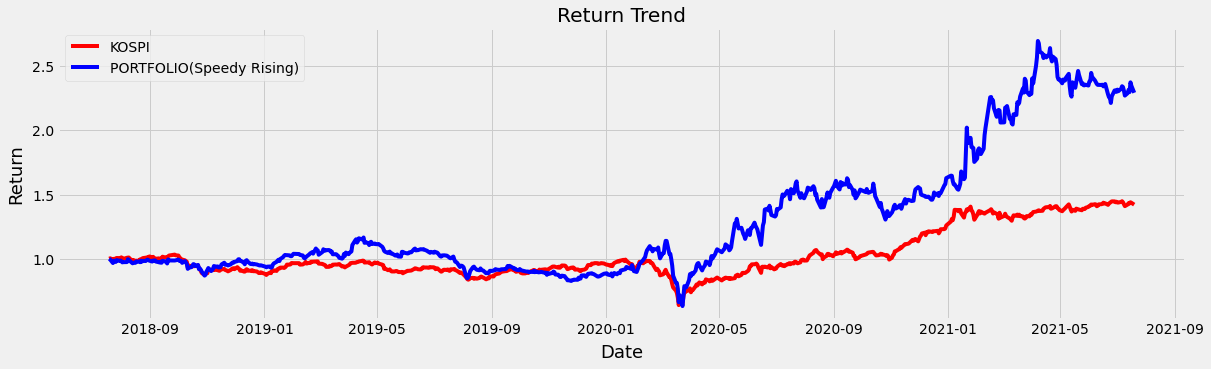

In [124]:
# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ÏôÄ KOSPI ÏßÄÏàòÏùò 'ÎàÑÏ†Å ÏàòÏùµÎ•† Ï∂îÏù¥'Î•º ÏãúÍ∞ÅÌôîÌïòÏó¨ ÎπÑÍµê

# matplotlib.pyplot Ïä§ÌÉÄÏùºÏãúÌä∏ ÏÑ§Ï†ï
plt.style.use('fivethirtyeight')

plt.figure(figsize=(18,5))
plt.plot(wealth2.index, wealth2.KOSPI , 'r', label='KOSPI')
plt.plot(wealth2.index, wealth2.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
plt.grid(True)
plt.title('Return Trend')
plt.xlabel('Date',fontsize=18, labelpad=7)
plt.ylabel('Return',fontsize=18, labelpad=7)
plt.legend(loc='best')
plt.show()

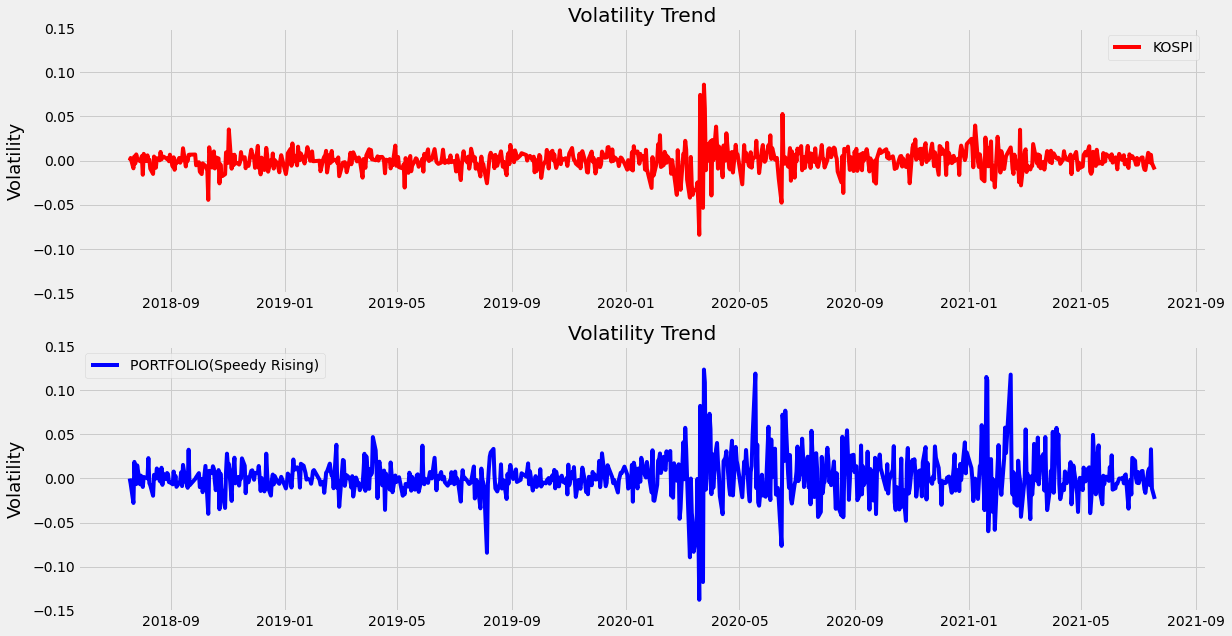

In [125]:
# Î≥ÄÎèôÎ•† ÎπÑÍµê
plt.figure(figsize=(18,10))

plt.subplot(2,1,1)
plt.title('Volatility Trend')

plt.plot(result2.index, result2.KOSPI , 'r', label='KOSPI')
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.grid(True)
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.title('Volatility Trend')
plt.plot(result2.index, result2.PORTFOLIO ,'b', label="PORTFOLIO(Speedy Rising)")
plt.yticks([-0.15, -0.10, -0.05, 0.00, 0.05, 0.10, 0.15])
plt.ylabel('Volatility',fontsize=18, labelpad=7)
plt.legend(loc='best')

plt.grid(True)
plt.show()

In [126]:
portfolio_df_sorted2

Ï¢ÖÎ™©Î™Ö    Ï¢ÖÎ™©ÏΩîÎìú   ÏàòÎüâ(Ï£º)     Ìà¨ÏûêÍ∏àÏï°(Ïõê)      Ìà¨ÏûêÎπÑÏ§ë
0   Ïî®Ïó†ÏóêÏä§ÏóêÎìÄ  225330   500.0   3790000.0  0.252669
1    Ïù∏ÌÖçÌîåÎü¨Ïä§  064290   172.0   3723800.0  0.248256
2   Ïú†ÏïàÌÉÄÏ¶ùÍ∂åÏö∞  003475   681.0   3020235.0  0.201351
3    ÏïÑÏ¶àÌÖçWB  032080   516.0   1511880.0  0.100793
4     ÏóîÌîºÏºÄÏù¥  048830   395.0   1188950.0  0.079264
5   Ï¥àÎ°ùÎ±ÄÎØ∏ÎîîÏñ¥  047820   342.0    897750.0  0.059851
6       ÏÇºÍ∏∞  122350   144.0    606960.0  0.040464
7     ÏÑ±Ìò∏Ï†ÑÏûê  043260   154.0    260260.0  0.017351
Ìï©Í≥Ñ     NaN     NaN  2904.0  14999835.0  1.000000

In [129]:
print('----- Speedy rising portfolio performance -----')
# Show Risk Limit
print('Risk limit: ', vol_limit2)

# Show Funds
print('Funds:', portfolio_val, 'KRW')

# Show Funds Remaining
print('Funds Remaining: ', leftover2, ' KRW')

# Show Portfolio performance
ef2.portfolio_performance(verbose=True)
rmse2 = da2._allocation_rmse_error(verbose=False)

----- Speedy rising portfolio performance -----
Risk limit:  0.3
Funds: 15000000 KRW
Funds Remaining:  165.0  KRW
Expected annual return: 30.3%
Annual volatility: 30.0%
Sharpe Ratio: 0.95
Allocation has RMSE: 0.000
